Original Inspiration
* https://towardsdatascience.com/a-designers-guide-to-visualize-a-text-dataset-1d534756e914 

In [1]:
# imports

#standard
import pandas as pd
#import random
from datetime import datetime
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

#Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Data Pulls
from bs4 import BeautifulSoup
import requests
import re

In [2]:
transcript = pd.read_csv('full_transcript.csv', index_col=0)
character_mapping = pd.read_csv('character_mapping.csv', index_col=0)
#Mapping 

transcript_df = pd.merge(transcript, character_mapping[['character','tribe']], on='character', how='left')

In [ ]:
df1 = transcript_df.loc[transcript_df['abs_episode'] == 1].copy()

In [ ]:
df1['x_top'] = range(1, 2 * len(df1) + 1, 2)
df1['x_bottom'] = range(1, 2 * len(df1) + 1, 2)

In [ ]:
df1['y_top'] = df1['word_count']/2
df1['y_bottom'] = df1['word_count']/2 * -1

In [ ]:
df1.head()

In [ ]:
#Create Title 
title = df1['episode_title'].unique()[0].replace("_", " ")
title

In [ ]:
# Create a plotly figure

import plotly.graph_objects as go
fig = go.Figure()

#[Color Inspiration](https://www.pinterest.com/pin/333407178667399146/)
tribe_color_map = {
    'air': '#F9D672',  # Air Nomad Yellow
    'water': '#81D3E8',  # Water Nation Blue
    'fire': '#D46627',  # Fire Nation Red
    'earth': '#005E00'   # Earth Kingdom Green
}

# Add line segments from theoffice_data
for i, row in df1.iterrows():
    # Get the color based on the tribe
    tribe = row['tribe']  # Assuming 'tribe' column exists
    color = tribe_color_map.get(tribe, '#595B77')  # Default color if tribe not in map

    # Add line trace
    fig.add_trace(go.Scatter(
        x=[row['x_top'], row['x_bottom']],
        y=[row['y_top'], row['y_bottom']],
        mode='lines',
        line=dict(color=color, width=2),  # Use dynamic color based on tribe
        hoverinfo='text',
        hovertext=f"{row['character']}: {row['dialogue']}",
        showlegend=False
    ))

episode_title = df1['episode_title'].unique()[0].replace("_", " ") 

# Customize layout to match ggplot style
fig.update_layout(
    title= episode_title,
    title_font_size=20,  # Customize title font size
    title_x=0.5,  # Center the title (0.5 means center)
    plot_bgcolor='white',
    xaxis=dict(showgrid=False, showticklabels=False),
    yaxis=dict(showgrid=False, showticklabels=False),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the figure
fig.show()


In [7]:
def transcript_viz(absolute_episode_number):
    """
    Visualize dialogue in episodes of Nickelodean's Avatar: The Last Airbender based 
    on which tribe/nationality is speaking.
    
    Parameters:
    a (int): Absolute episode number

    Returns:
    A Plotly Fig
    """
    
    df = transcript_df.loc[transcript_df['abs_episode'] == absolute_episode_number].copy()
    
    #Map X & Y Coordinates
    df['x_top'] = range(1, 2 * len(df) + 1, 2)
    df['x_bottom'] = range(1, 2 * len(df) + 1, 2)
    
    df['y_top'] = df['word_count']/2
    df['y_bottom'] = df['word_count']/2 * -1
    
    #Create Title for Plotly Graph
    episode_title = df['episode_title'].unique()[0].replace("_", " ") 
    
    #[Color Inspiration](https://www.pinterest.com/pin/333407178667399146/)
    tribe_color_map = {
        'air': '#F9D672',  # Air Nomad Yellow
        'water': '#81D3E8',  # Water Nation Blue
        'fire': '#D46627',  # Fire Nation Red
        'earth': '#729F3D'   # Earth Kingdom Green
    }
    
    fig = go.Figure()
    
    # Create line segments from transcript_df
    for i, row in df.iterrows():
        # Get the color based on the tribe
        tribe = row['tribe']  # Assuming 'tribe' column exists
        color = tribe_color_map.get(tribe, '#848587')  # Color defaults to Gray if no Tribe

        # Add line trace
        fig.add_trace(go.Scatter(
            x=[row['x_top'], row['x_bottom']],
            y=[row['y_top'], row['y_bottom']],
            mode='lines',
            line=dict(color=color, width=2),  # Use dynamic color based on tribe
            hoverinfo='text',
            hovertext=f"{row['character']}: {row['dialogue']}",
            showlegend=False
        ))

    # Customize layout to match ggplot style
    fig.update_layout(
        title= episode_title,
        title_font_size=20,  # Customize title font size
        title_x=0.5,  # Center the title (0.5 means center)
        plot_bgcolor='white',
        xaxis=dict(showgrid=False, showticklabels=False),
        yaxis=dict(showgrid=False, showticklabels=False),
        margin=dict(l=50, r=50, t=50, b=0),
        hovermode="closest"
    )
    
    return fig

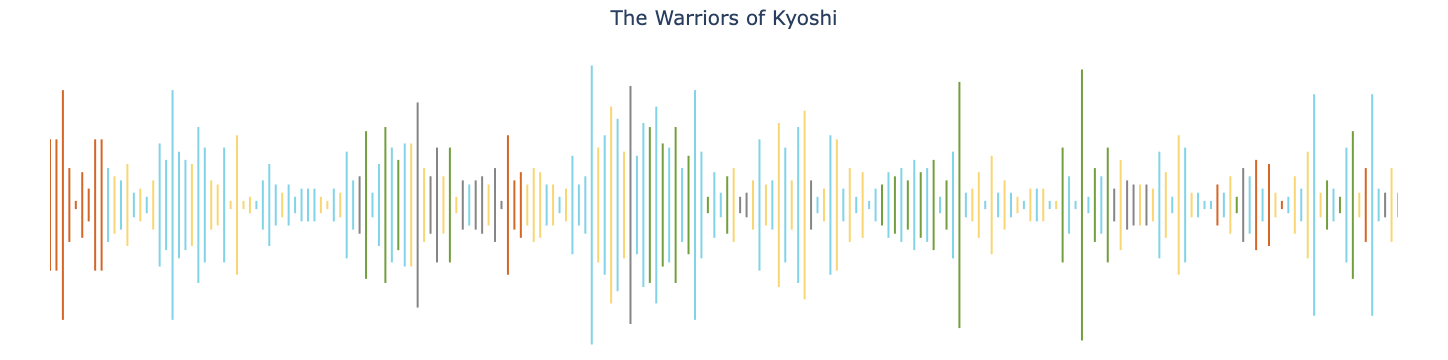

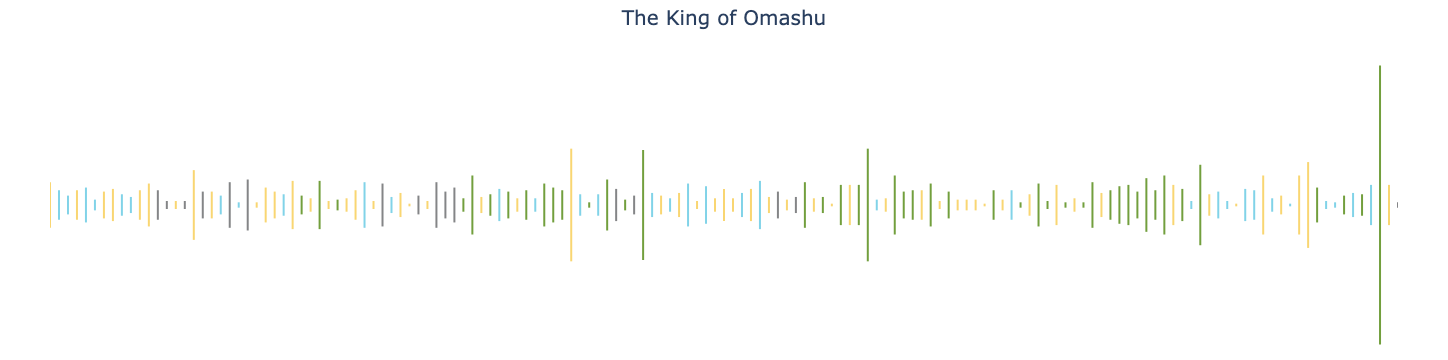

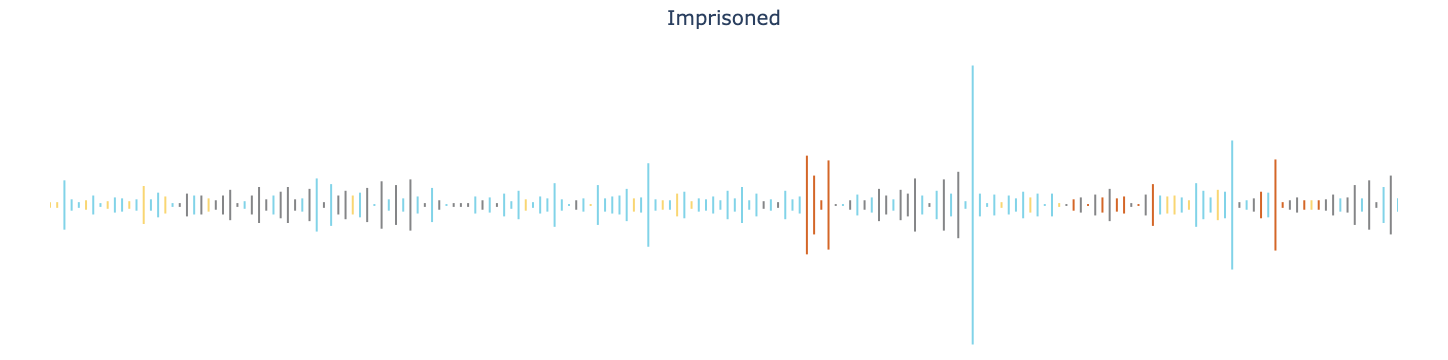

In [8]:
for episode_num in transcript_df['abs_episode'].unique()[3:6]:
    fig = transcript_viz(episode_num)
    fig.show()